# Libraries

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

In [115]:
data = pd.read_excel('Data_Train.xlsx')
data2 = pd.read_excel('Data_Test.xlsx')

In [116]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [117]:
data2.tail()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN
1233,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN


#### Categorical Columns

Location, Year, Fuel_Type, Transmission, Owner_type, Seats

In [118]:
data.shape

(6019, 13)

In [119]:
data2.shape

(1234, 12)

In [120]:
data.drop_duplicates(keep=False, inplace=True)

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(9)
memory usage: 658.3+ KB


In [122]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 12 columns):
Name                 1234 non-null object
Location             1234 non-null object
Year                 1234 non-null int64
Kilometers_Driven    1234 non-null int64
Fuel_Type            1234 non-null object
Transmission         1234 non-null object
Owner_Type           1234 non-null object
Mileage              1234 non-null object
Engine               1224 non-null object
Power                1224 non-null object
Seats                1223 non-null float64
New_Price            182 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 115.8+ KB


In [123]:
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [124]:
data2.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

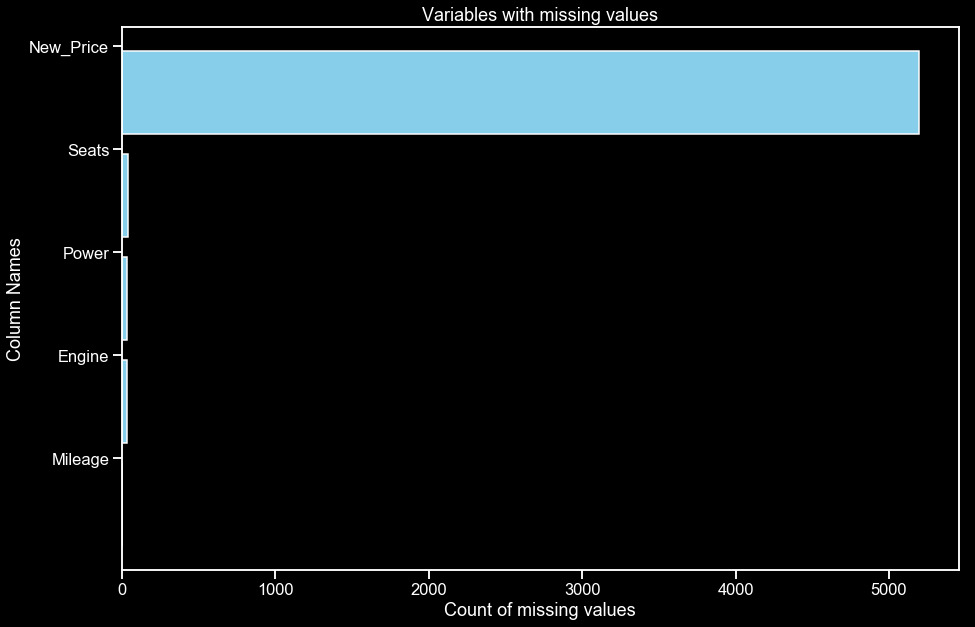

In [125]:
null_columns=data.columns[data.isnull().any()]
labels = []
values = []
for col in null_columns:
    labels.append(col)
    values.append(data[col].isnull().sum())
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,10))
ax.barh(ind, np.array(values), color='SkyBlue')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_ylabel("Column Names")
ax.set_title("Variables with missing values");

### ENGINE

In [126]:
data[['Engine','E_Units']] = data.Engine.str.split(" ",expand=True,)
del data['E_Units']
data2[['Engine','E_Units']] = data2.Engine.str.split(" ",expand=True,)
del data2['E_Units']
# deleting because all units are same

In [127]:
data.Engine = data.Engine.apply(pd.to_numeric,errors='coerce') 
# Null Values with NAN
data["Engine"].fillna(0,inplace=True)
# NAN with 0
data2.Engine = data2.Engine.apply(pd.to_numeric,errors='coerce') 
data2["Engine"].fillna(0,inplace=True)

In [128]:
skew(data.Engine)

1.2737553393682812

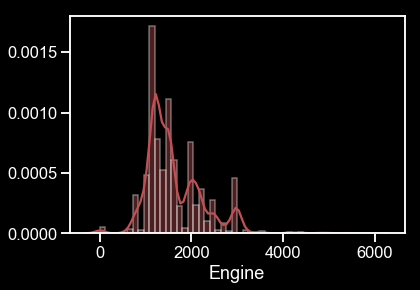

In [129]:
sns.distplot(data['Engine'], color="r", kde=True)

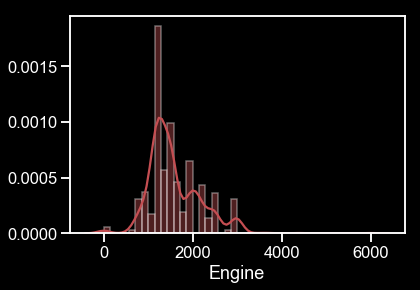

In [130]:
sns.distplot(data2['Engine'], color="r", kde=True)

In [131]:
data['Engine']=np.sqrt(data['Engine'])
data2['Engine']=np.sqrt(data2['Engine'])
# Transformation

In [132]:
skew(data.Engine)

-0.08246638905840889

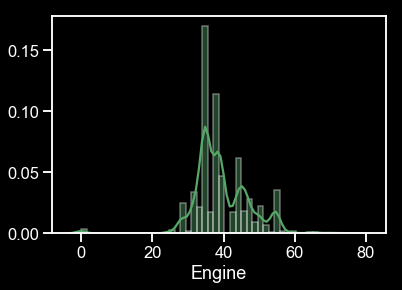

In [133]:
sns.distplot(data['Engine'], color="g", kde=True)

In [134]:
data.Engine = np.where(data.Engine==0, data.Engine.mean(), data.Engine)
data2.Engine = np.where(data2.Engine==0, data2.Engine.mean(), data2.Engine)
# Replacing with MEAN
data['Engine'] = data['Engine'].round(2)
data2['Engine'] = data2['Engine'].round(2)

In [135]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,31.59,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,39.77,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,34.63,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,35.33,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,44.36,140.8 bhp,5.0,NaN,17.74


In [136]:
data2.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,31.59,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,28.21,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,48.92,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,36.93,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,34.60,82.85 bhp,5.0,NaN


### POWER

In [137]:
data[['Power','P_Units']] = data.Power.str.split(" ",expand=True,)
del data['P_Units']
data2[['Power','P_Units']] = data2.Power.str.split(" ",expand=True,)
del data2['P_Units']

In [138]:
data.Power = data.Power.apply(pd.to_numeric,errors='coerce') 
# Null Values with NAN
data["Power"].fillna(0,inplace=True)
# NAN with 0
data2.Power = data2.Power.apply(pd.to_numeric,errors='coerce') 
data2["Power"].fillna(0,inplace=True)

In [139]:
skew(data.Engine)

0.8718338438252697

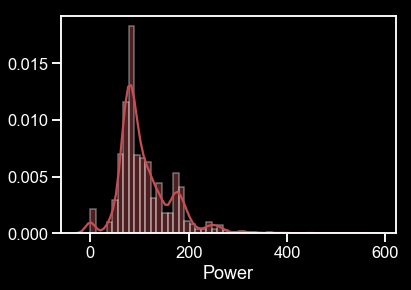

In [140]:
sns.distplot(data['Power'], color="r", kde=True)

In [141]:
data['Power']=np.sqrt(data['Power'])
data2['Power']=np.sqrt(data2['Power'])
# Transformation

In [142]:
skew(data.Power)

-0.39839315448943685

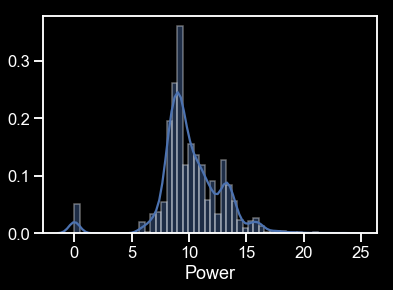

In [143]:
sns.distplot(data['Power'], color="b", kde=True)

In [144]:
data.Power = np.where(data.Power==0, data.Power.mean(), data.Power)
data2.Power = np.where(data2.Power==0, data2.Power.mean(), data2.Power)
# Replacing with MEAN
data['Power'] = data['Power'].round(2)
data2['Power'] = data2['Power'].round(2)

### SEATS

In [145]:
data['Seats'].value_counts(normalize=True)*100

5.0     83.888238
7.0     11.276560
8.0      2.241927
4.0      1.656349
6.0      0.518655
2.0      0.267693
10.0     0.083654
9.0      0.050192
0.0      0.016731
Name: Seats, dtype: float64

In [146]:
data2['Seats'].value_counts(normalize=True)*100

5.0     84.464432
7.0      9.975470
8.0      2.943581
4.0      1.635323
6.0      0.572363
10.0     0.245298
2.0      0.163532
Name: Seats, dtype: float64

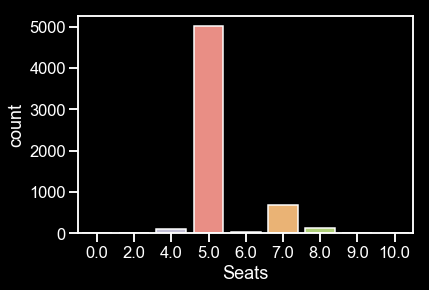

In [147]:
sns.countplot(data['Seats'], label = "Count")

In [148]:
data['Seats'].fillna(0,inplace=True)
data2['Seats'].fillna(0,inplace=True)

### NewPrice

In [149]:
data["New_Price"].fillna(0,inplace=True)
data2["New_Price"].fillna(0,inplace=True)

### Mileage

In [150]:
data[['Mileage','M_Units']] = data.Mileage.str.split(" ",expand=True,)
del data['M_Units']
data2[['Mileage','M_Units']] = data2.Mileage.str.split(" ",expand=True,)
del data2['M_Units']

In [151]:
data.Mileage = data.Mileage.apply(pd.to_numeric,errors='coerce') 
# Null Values with NAN
data['Mileage'].fillna(0,inplace=True)
# NAN with 0
data2.Mileage = data2.Mileage.apply(pd.to_numeric,errors='coerce') 

In [152]:
skew(data.Mileage)

-0.444874108638433

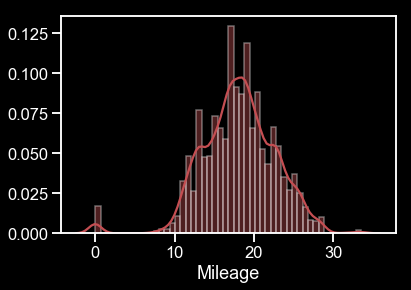

In [153]:
sns.distplot(data['Mileage'], color="r", kde=True)

In [154]:
data.Mileage = np.where(data.Mileage==0, data.Mileage.mean(), data.Mileage)

In [155]:
data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

In [156]:
data2.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
dtype: int64

In [157]:
data2.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,31.59,7.63,4.0,0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,28.21,6.88,5.0,0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,48.92,12.16,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,36.93,10.01,5.0,0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,34.60,9.10,5.0,0


In [158]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,31.59,7.63,5.0,0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,39.77,11.23,5.0,0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,34.63,9.42,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,35.33,9.42,7.0,0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,44.36,11.87,5.0,0,17.74


# Univariate Analysis

## Location

In [159]:
data.Location.value_counts(normalize=True)*100

Mumbai        13.125104
Hyderabad     12.327629
Kochi         10.815750
Coimbatore    10.566539
Pune          10.333943
Delhi          9.204187
Kolkata        8.888520
Chennai        8.207343
Jaipur         6.861605
Bangalore      5.947832
Ahmedabad      3.721548
Name: Location, dtype: float64

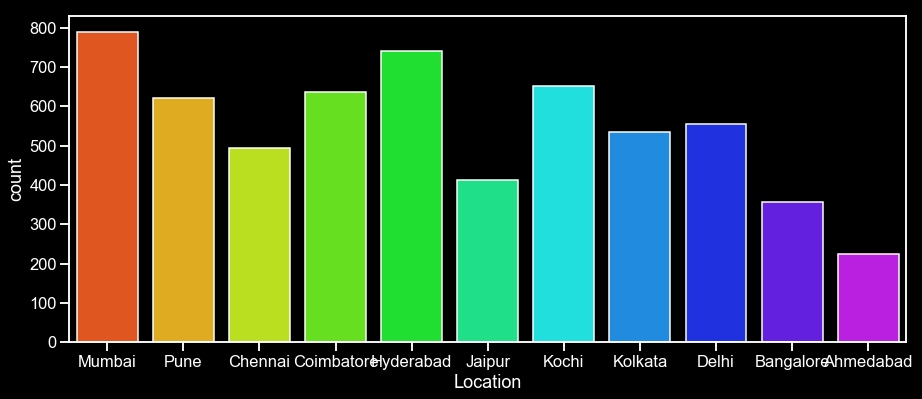

In [160]:
plt.figure(figsize=(15,6))
sns.countplot(x="Location",data=data,palette='gist_rainbow')

## YEAR

In [161]:
data.Year.value_counts(normalize=True)*100

2014    13.241402
2015    12.360857
2016    12.311015
2013    10.782522
2017     9.752451
2012     9.636152
2011     7.742150
2010     5.682007
2018     4.950989
2009     3.289583
2008     2.890846
2007     2.076757
2019     1.694634
2006     1.295896
2005     0.947001
2004     0.515036
2003     0.282439
2002     0.249211
2001     0.132912
1998     0.066456
2000     0.066456
1999     0.033228
Name: Year, dtype: float64

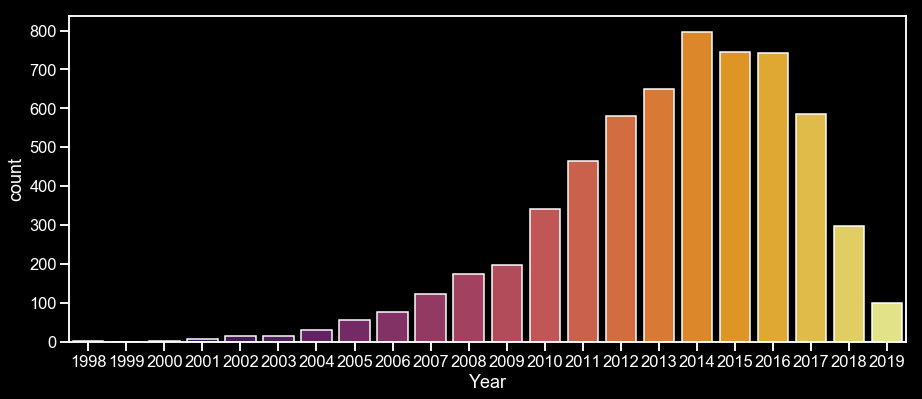

In [162]:
plt.figure(figsize=(15,6))
sns.countplot(x="Year",data=data,palette='inferno')

Cars of around 5 years ago model, are more likely to be sold and bought, as this is the normal age for a car to start getting into trouble. 

In [163]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,31.59,7.63,5.0,0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,39.77,11.23,5.0,0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,34.63,9.42,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,35.33,9.42,7.0,0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,44.36,11.87,5.0,0,17.74


## KM_Driven

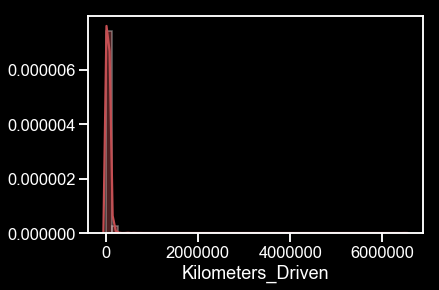

In [164]:
sns.distplot(data['Kilometers_Driven'], color="r", kde=True)

## FUEL TYPE

In [165]:
data.Fuel_Type.value_counts(normalize=True)*100

Diesel      53.248048
Petrol      45.622196
CNG          0.930387
LPG          0.166141
Electric     0.033228
Name: Fuel_Type, dtype: float64

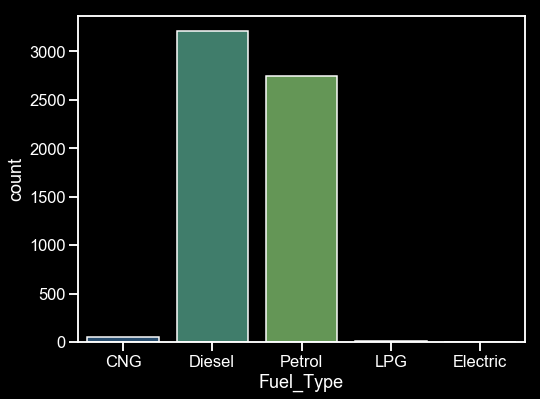

In [166]:
plt.figure(figsize=(8,6))
sns.countplot(x="Fuel_Type",data=data,palette='gist_earth')

## TRANSMISSION

In [167]:
data.Transmission.value_counts(normalize=True)*100

Manual       71.423825
Automatic    28.576175
Name: Transmission, dtype: float64

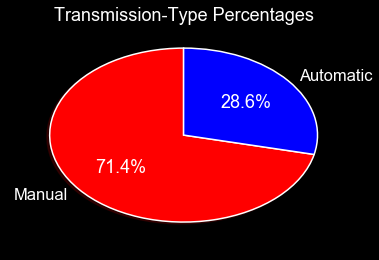

In [168]:
temp_series = data.Transmission.value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series/temp_series.sum())*100))
colors = ['Red','Blue']
plt.pie(sizes,labels = labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=90)
plt.title("Transmission-Type Percentages")
plt.show()

In [169]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,31.59,7.63,5.0,0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,39.77,11.23,5.0,0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,34.63,9.42,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,35.33,9.42,7.0,0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,44.36,11.87,5.0,0,17.74


## Owner_Type

In [170]:
data.Owner_Type.value_counts(normalize=True)*100

First             81.890680
Second            16.082406
Third              1.877388
Fourth & Above     0.149526
Name: Owner_Type, dtype: float64

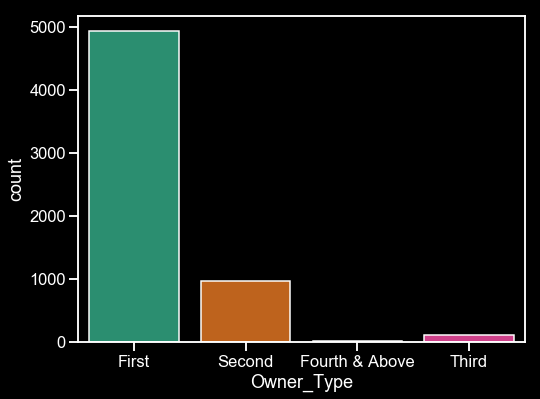

In [171]:
plt.figure(figsize=(8,6))
sns.countplot(x="Owner_Type",data=data,palette='Dark2')

In [172]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,31.59,7.63,5.0,0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,39.77,11.23,5.0,0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,34.63,9.42,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,35.33,9.42,7.0,0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,44.36,11.87,5.0,0,17.74


## Price

In [173]:
#sns.distplot(data['Price'], color="r", kde=True)

In [174]:
#data.Price = np.log10(data.Price)

In [175]:
#sns.distplot(data['Price'], color="r", kde=True)

In [176]:
#data.Price = 10**data.Price

# Bivariate Analysis

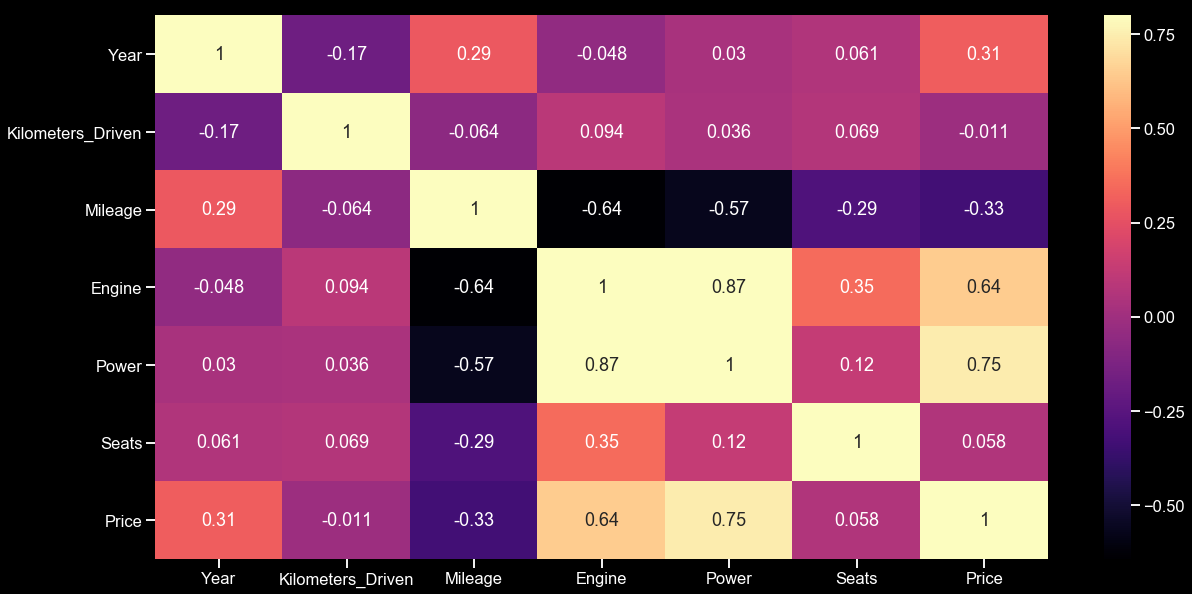

In [177]:
plt.figure(figsize=(20,10)) 
sns.heatmap(data.corr(), annot=True,cmap='magma',linecolor="black",vmax=0.8)

## 1) Independent V/s Independent

In [178]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,31.59,7.63,5.0,0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,39.77,11.23,5.0,0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,34.63,9.42,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,35.33,9.42,7.0,0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,44.36,11.87,5.0,0,17.74


In [179]:
contingency_table=pd.crosstab(data["Location"],data["Transmission"])
print('contingency_table :-\n',contingency_table)

contingency_table :-
 Transmission  Automatic  Manual
Location                       
Ahmedabad            58     166
Bangalore           144     214
Chennai             120     374
Coimbatore          247     389
Delhi               171     383
Hyderabad           196     546
Jaipur               52     361
Kochi               205     446
Kolkata              80     455
Mumbai              303     487
Pune                144     478


In [180]:
#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[ 58 166]
 [144 214]
 [120 374]
 [247 389]
 [171 383]
 [196 546]
 [ 52 361]
 [205 446]
 [ 80 455]
 [303 487]
 [144 478]]


In [181]:
#Expected Values
import scipy.stats
b=scipy.stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)

Expected Values :-
 [[ 64.010633   159.989367  ]
 [102.30270809 255.69729191]
 [141.1663067  352.8336933 ]
 [181.74447583 454.25552417]
 [158.31201196 395.68798804]
 [212.0352218  529.9647782 ]
 [118.01960459 294.98039541]
 [186.03090214 464.96909786]
 [152.88253863 382.11746137]
 [225.75178601 564.24821399]
 [177.74381126 444.25618874]]


In [182]:
#Degree of Freedom
no_of_rows=len(contingency_table.iloc[0:11,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
df=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",df)

Degree of Freedom:- 10


In [183]:
#Significance Level 5%
alpha=0.05
#chi-square statistic - χ2
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:",chi_square_statistic)

chi-square statistic: 213.99306588446387


In [184]:
#critical_value
critical_value=chi2.ppf(q=1-alpha,df=df)
print('critical_value:',critical_value)

critical_value: 18.307038053275146


In [185]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
float_formatter = "{:.5f}".format
print('p-value: ', float_formatter(p_value))

p-value:  0.00000


In [186]:
print('Significance level: ',alpha)
print('Degree of Freedom: ',df)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
#compare chi_square_statistic with critical_value and p-value which is the probability of getting chi-square>0.09 (chi_square_statistic)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Significance level:  0.05
Degree of Freedom:  10
chi-square statistic: 213.99306588446387
critical_value: 18.307038053275146
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


### FUEL_TYPE & KILOMETERS_DRIVEN

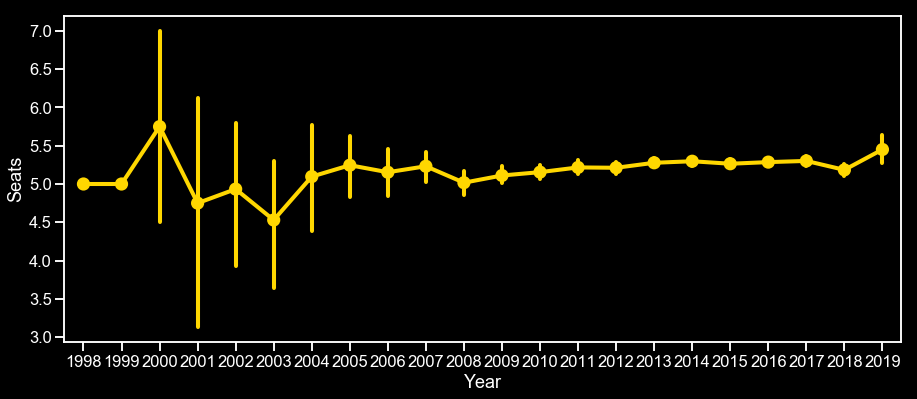

In [187]:
plt.figure(figsize=(15,6))
sns.pointplot(data['Year'],data['Seats'],color='Gold')

In [188]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,31.59,7.63,5.0,0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,39.77,11.23,5.0,0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,34.63,9.42,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,35.33,9.42,7.0,0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,44.36,11.87,5.0,0,17.74


### KILOMETES_DRIVEN & POWER

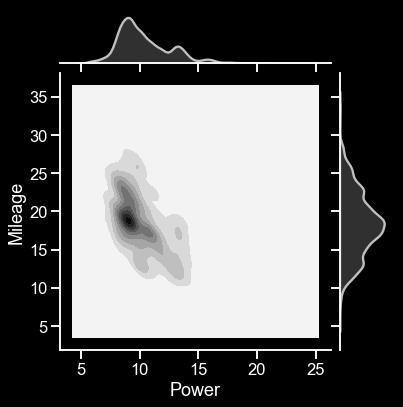

In [189]:
sns.jointplot('Power','Mileage',data=data,kind='kde',color='silver')

### POWER & FUEL_TYPE

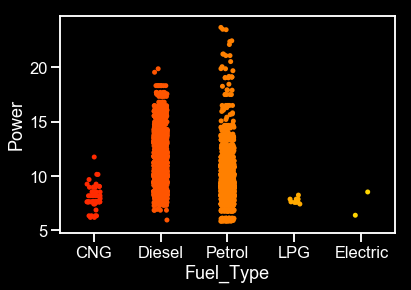

In [190]:
sns.stripplot(x=data["Fuel_Type"], y=data["Power"],jitter=True,palette='autumn')

### OWNER_TYPE & POWER

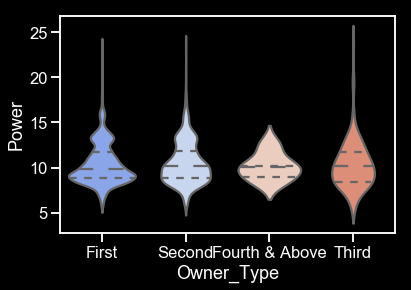

In [191]:
sns.violinplot('Owner_Type','Power',data=data,bw='scott',scale='area',split=False,inner='quartile',palette='coolwarm')

In [192]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,31.59,7.63,5.0,0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,39.77,11.23,5.0,0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,34.63,9.42,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,35.33,9.42,7.0,0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,44.36,11.87,5.0,0,17.74


### LOCATION & POWER

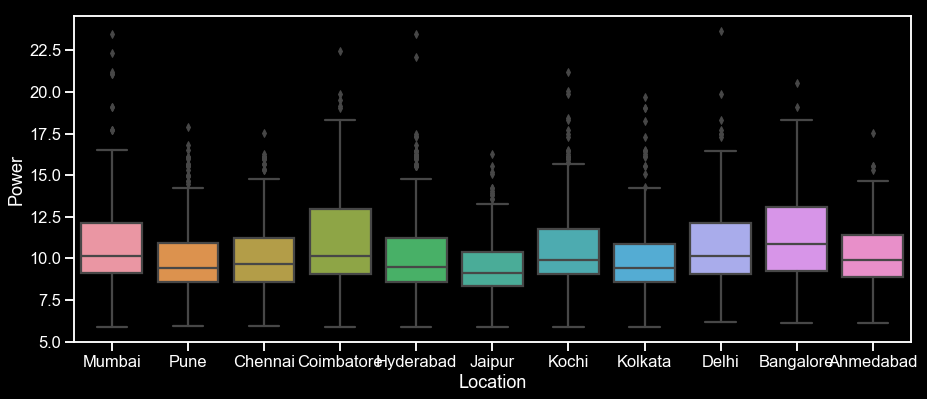

In [193]:
plt.figure(figsize=(15,6))
sns.boxplot('Location','Power',data=data)

In [194]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,31.59,7.63,5.0,0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,39.77,11.23,5.0,0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,34.63,9.42,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,35.33,9.42,7.0,0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,44.36,11.87,5.0,0,17.74


### Year & Owner_Type

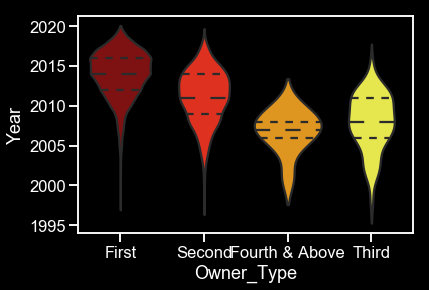

In [195]:
sns.violinplot('Owner_Type','Year',data=data,bw='scott',scale='area',split=False,inner='quartile',palette='hot')

In [196]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,31.59,7.63,5.0,0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,39.77,11.23,5.0,0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,34.63,9.42,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,35.33,9.42,7.0,0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,44.36,11.87,5.0,0,17.74


## 2) Dependent V/s Independent  

### a) Location & Price

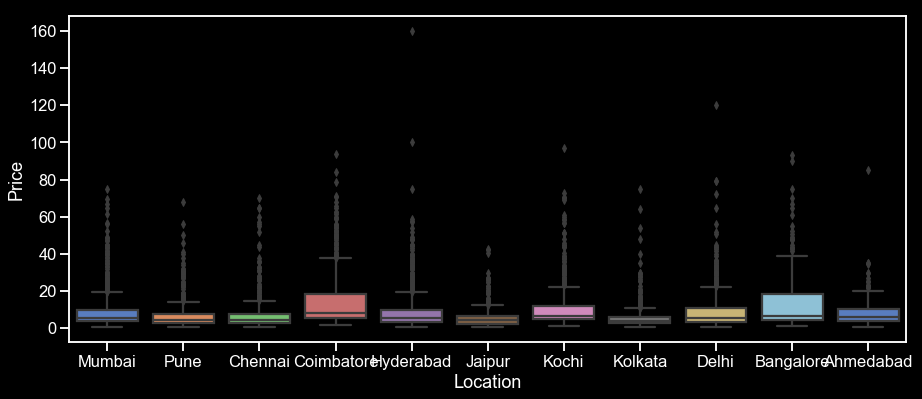

In [197]:
plt.figure(figsize=(15,6))
sns.boxplot(data["Location"], data["Price"],palette='muted')

### b) Price & Year

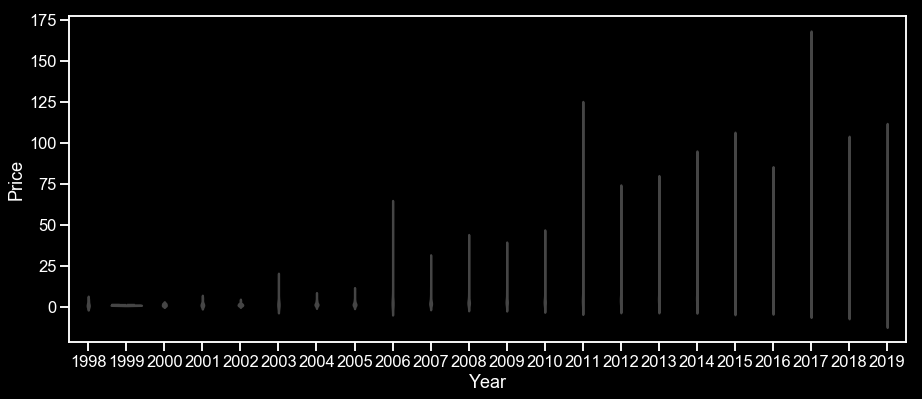

In [198]:
plt.figure(figsize=(15,6))
sns.violinplot('Year','Price',data=data,bw='scott',scale='area',split=False,inner='quartile')

### c) KM & Price

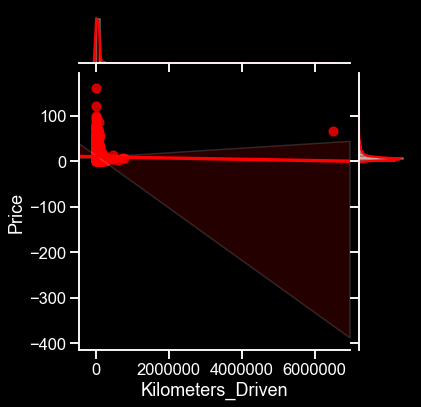

In [199]:
sns.jointplot('Kilometers_Driven','Price',data=data,kind='reg',color='red')

# Feature Engineering

In [200]:
'''seq = data['Name'].apply(lambda x: x.split()[0])
data.insert(0,'Company',seq)
seq = data['Name'].apply(lambda x: x.split()[1])
data.insert(0,'Model',seq)'''

"seq = data['Name'].apply(lambda x: x.split()[0])\ndata.insert(0,'Company',seq)\nseq = data['Name'].apply(lambda x: x.split()[1])\ndata.insert(0,'Model',seq)"

In [201]:
'''seq = data2['Name'].apply(lambda x: x.split()[0])
data2.insert(0,'Company',seq)
seq = data2['Name'].apply(lambda x: x.split()[1])
data2.insert(0,'Model',seq)'''

"seq = data2['Name'].apply(lambda x: x.split()[0])\ndata2.insert(0,'Company',seq)\nseq = data2['Name'].apply(lambda x: x.split()[1])\ndata2.insert(0,'Model',seq)"

In [202]:
seq = data['Kilometers_Driven']/data['Mileage']
data.insert(0,'Fuel_Consumed',seq)

data['Fuel_Consumed'] = data['Fuel_Consumed'].round(2)

In [203]:
seq = data2['Kilometers_Driven']/data2['Mileage']
data2.insert(0,'Fuel_Consumed',seq)

data2['Fuel_Consumed'] = data2['Fuel_Consumed'].round(2)

# Data Preparation

In [204]:
data.head()

,Fuel_Consumed,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,2706.77,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,31.59,7.63,5.0,0,1.75
1,2084.39,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,39.77,11.23,5.0,0,12.50
2,2527.47,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,34.63,9.42,5.0,8.61 Lakh,4.50
3,4188.73,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,35.33,9.42,7.0,0,6.00
4,2675.66,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,44.36,11.87,5.0,0,17.74


In [205]:
data2.head()

,Fuel_Consumed,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,1268.72,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,31.59,7.63,4.0,0
1,2206.19,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,28.21,6.88,5.0,0
2,2485.38,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,48.92,12.16,7.0,25.27 Lakh
3,5892.33,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,36.93,10.01,5.0,0
4,1567.57,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,34.60,9.10,5.0,0


### Model

In [206]:
'''frequency_map = (data['Model'].value_counts() / len(data) ).to_dict()
data['Model'] = data['Model'].map(frequency_map)
data2['Model'] = data2['Model'].map(frequency_map)'''

"frequency_map = (data['Model'].value_counts() / len(data) ).to_dict()\ndata['Model'] = data['Model'].map(frequency_map)\ndata2['Model'] = data2['Model'].map(frequency_map)"

### Company

In [207]:
'''frequency_map = (data['Company'].value_counts() / len(data) ).to_dict()
data['Company'] = data['Company'].map(frequency_map)
data2['Company'] = data2['Company'].map(frequency_map)'''

"frequency_map = (data['Company'].value_counts() / len(data) ).to_dict()\ndata['Company'] = data['Company'].map(frequency_map)\ndata2['Company'] = data2['Company'].map(frequency_map)"

### Name

In [208]:
del data['Name']
del data2['Name']

### Location

In [209]:
frequency_map = (data['Location'].value_counts() / len(data) ).to_dict()
data['Location'] = data['Location'].map(frequency_map)
data2['Location'] = data2['Location'].map(frequency_map)

### Year, Transmission - LABEL ENCODING

### Fuel type, Owner - OneHot Encoding

### Mileage, Engine

In [210]:
'''del data['Mileage']
del data['Engine']
del data2['Mileage']
del data2['Engine']'''

"del data['Mileage']\ndel data['Engine']\ndel data2['Mileage']\ndel data2['Engine']"

### Seats

In [211]:
data['Seats'] = data['Seats'].astype(int)
data2['Seats'] = data2['Seats'].astype(int)

### New_Price

In [212]:
del data['New_Price']
del data2['New_Price']

# Machine Learning 

In [213]:
X_train = data.drop(['Price'],axis=1)
y_train = data['Price']
X_test = data2

In [214]:
df = pd.get_dummies(X_train.Fuel_Type,drop_first=True)
X_train =pd.concat([df,X_train],axis=1)
del X_train['Fuel_Type']
df = pd.get_dummies(X_test.Fuel_Type,drop_first=True)
X_test =pd.concat([df,X_test],axis=1)
del X_test['Fuel_Type']

In [215]:
df = pd.get_dummies(X_train.Owner_Type,drop_first=True)
X_train =pd.concat([df,X_train],axis=1)
del X_train['Owner_Type']
df = pd.get_dummies(X_test.Owner_Type,drop_first=True)
X_test =pd.concat([df,X_test],axis=1)
del X_test['Owner_Type']

In [216]:
del X_train['Electric']

In [217]:
X_train.head()

,Fourth & Above,Second,Third,Diesel,LPG,Petrol,Fuel_Consumed,Location,Year,Kilometers_Driven,Transmission,Mileage,Engine,Power,Seats
0,0,0,0,0,0,0,2706.77,0.131251,2010,72000,Manual,26.60,31.59,7.63,5
1,0,0,0,1,0,0,2084.39,0.103339,2015,41000,Manual,19.67,39.77,11.23,5
2,0,0,0,0,0,1,2527.47,0.082073,2011,46000,Manual,18.20,34.63,9.42,5
3,0,0,0,1,0,0,4188.73,0.082073,2012,87000,Manual,20.77,35.33,9.42,7
4,0,1,0,1,0,0,2675.66,0.105665,2013,40670,Automatic,15.20,44.36,11.87,5


In [218]:
X_test.head()

,Fourth & Above,Second,Third,Diesel,LPG,Petrol,Fuel_Consumed,Location,Year,Kilometers_Driven,Transmission,Mileage,Engine,Power,Seats
0,0,0,0,0,0,0,1268.72,0.092042,2014,40929,Manual,32.26,31.59,7.63,4
1,0,1,0,0,0,1,2206.19,0.105665,2013,54493,Manual,24.70,28.21,6.88,5
2,0,0,0,1,0,0,2485.38,0.131251,2017,34000,Manual,13.68,48.92,12.16,7
3,0,0,0,1,0,0,5892.33,0.123276,2012,139000,Manual,23.59,36.93,10.01,5
4,0,0,0,0,0,1,1567.57,0.131251,2014,29000,Manual,18.50,34.60,9.10,5


In [219]:
from sklearn.preprocessing import LabelEncoder
le_X= LabelEncoder()
X_train['Transmission']=le_X.fit_transform(X_train['Transmission'])
X_test['Transmission']=le_X.fit_transform(X_test['Transmission'])

In [220]:
X_test.shape

(1234, 15)

# Modelling

In [221]:
import xgboost as xgb

In [222]:
xgb = xgb.XGBRegressor()
xgb.fit(X_train,y_train)
y_pred= xgb.predict(X_test)

In [223]:
col={'Price':y_pred}
submission = pd.DataFrame(col,columns=['Price'])

In [224]:
filename = 'Car_Price_Prediction_2.xlsx'
submission.to_excel(filename,index=False)
print('Saved file: ' + filename)

Saved file: Car_Price_Prediction_2.xlsx
